In [ ]:
msft=yf.Ticker("MSFT")
msft.info
msft.history(period="1y")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-23 00:00:00-05:00,238.980979,243.015200,237.543711,240.447968,31934000,0.0,0.0
2023-01-24 00:00:00-05:00,240.368683,241.805936,238.326791,239.912720,40234400,0.0,0.0
2023-01-25 00:00:00-05:00,232.419157,241.161645,228.870619,238.495285,66526600,0.0,0.0
2023-01-26 00:00:00-05:00,241.508569,246.127616,239.873077,245.820343,33454500,0.0,0.0
2023-01-27 00:00:00-05:00,246.801650,247.634264,244.660630,245.978943,26498900,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-17 00:00:00-05:00,387.980011,390.109985,384.809998,389.470001,22234100,0.0,0.0
2024-01-18 00:00:00-05:00,391.720001,393.989990,390.119995,393.869995,23392100,0.0,0.0
2024-01-19 00:00:00-05:00,395.760010,398.670013,393.500000,398.670013,29272000,0.0,0.0


In [ ]:
msft_new=msft.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
print(msft_new)

                                 Open        High         Low       Close
Date                                                                     
2023-01-23 00:00:00-05:00  238.980979  243.015200  237.543711  240.447968
2023-01-24 00:00:00-05:00  240.368683  241.805936  238.326791  239.912720
2023-01-25 00:00:00-05:00  232.419157  241.161645  228.870619  238.495285
2023-01-26 00:00:00-05:00  241.508569  246.127616  239.873077  245.820343
2023-01-27 00:00:00-05:00  246.801650  247.634264  244.660630  245.978943
...                               ...         ...         ...         ...
2024-01-17 00:00:00-05:00  387.980011  390.109985  384.809998  389.470001
2024-01-18 00:00:00-05:00  391.720001  393.989990  390.119995  393.869995
2024-01-19 00:00:00-05:00  395.760010  398.670013  393.500000  398.670013
2024-01-22 00:00:00-05:00  400.019989  400.619995  393.589996  396.510010
2024-01-23 00:00:00-05:00  395.750000  397.464996  393.970001  397.200012

[252 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np
!pip install yfinance
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

                                Close       SMA50
Date                                             
2023-08-23 00:00:00-04:00  326.337646  333.267264
2023-08-24 00:00:00-04:00  319.321899  332.995541
2023-08-25 00:00:00-04:00  322.325806  332.723148
2023-08-28 00:00:00-04:00  323.044342  332.250816
2023-08-29 00:00:00-04:00  327.744781  331.987416
...                               ...         ...
2024-01-17 00:00:00-05:00  389.470001  372.997105
2024-01-18 00:00:00-05:00  393.869995  373.832797
2024-01-19 00:00:00-05:00  398.670013  374.690041
2024-01-22 00:00:00-05:00  396.510010  375.424246
2024-01-23 00:00:00-05:00  397.200012  376.118960

[105 rows x 2 columns]


<Axes: title={'center': 'Sma vs close'}, xlabel='Date'>

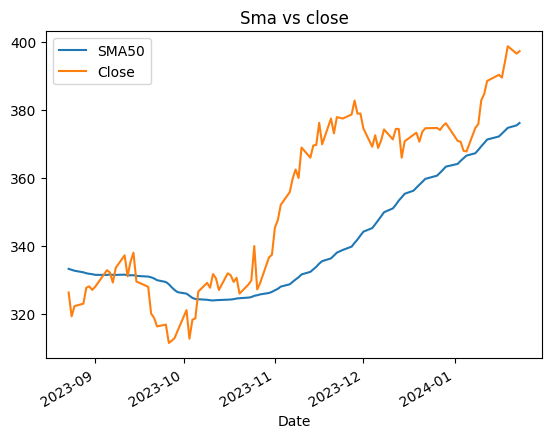

In [ ]:
msft_new=msft_new['Close'].to_frame()
msft_new['SMA50']=msft_new.rolling(50).mean()
msft_new=msft_new.dropna()
print (msft_new)
msft_new[['SMA50', 'Close']].plot(title="Sma vs close")

In [ ]:
data=yf.download('MSFT',start="2023-03-03",end="2024-01-01")['Close']
print(data)

[*********************100%%**********************]  1 of 1 completed

Date
2023-03-03    255.289993
2023-03-06    256.869995
2023-03-07    254.149994
2023-03-08    253.699997
2023-03-09    252.320007
                 ...    
2023-12-22    374.579987
2023-12-26    374.660004
2023-12-27    374.070007
2023-12-28    375.279999
2023-12-29    376.040009
Name: Close, Length: 209, dtype: float64


In [ ]:
def EMA(data, column, period, wf=0.2):
  ema = [data[column].iloc[0]] * period
  for i in range(1, len(data)):
    ema = wf * data[column].iloc[i] + (1 - wf) * ema[-1]
    ema.append(ema)
  return pd.Series(ema,index=data.index)



In [ ]:
def rsi(data):
 delta=data.diff()
 gain=delta.where(delta>0,0)
 loss=-delta.where(delta<0,0)
 avg_gain=gain.rolling(window=14).mean()
 avg_loss=loss.rolling(window=14).mean()
 rs=avg_gain/avg_loss
 rsi=100-(100/(1+rs))
 return rsi
print(rsi(data))

Date
2023-03-03          NaN
2023-03-06          NaN
2023-03-07          NaN
2023-03-08          NaN
2023-03-09          NaN
                ...    
2023-12-22    56.647070
2023-12-26    52.844242
2023-12-27    57.639899
2023-12-28    56.453020
2023-12-29    52.916520
Name: Close, Length: 209, dtype: float64


                                Close      MACD
Date                                           
2023-01-23 00:00:00-05:00  240.447968  0.000000
2023-01-24 00:00:00-05:00  239.912720 -0.012009
2023-01-25 00:00:00-05:00  238.495285 -0.059256
2023-01-26 00:00:00-05:00  245.820343  0.185176
2023-01-27 00:00:00-05:00  245.978943  0.320409
...                               ...       ...
2024-01-17 00:00:00-05:00  389.470001  4.733266
2024-01-18 00:00:00-05:00  393.869995  5.397518
2024-01-19 00:00:00-05:00  398.670013  6.239341
2024-01-22 00:00:00-05:00  396.510010  6.655476
2024-01-23 00:00:00-05:00  397.165009  6.957914

[252 rows x 2 columns]


<Axes: title={'center': 'macd vs close'}, xlabel='Date'>

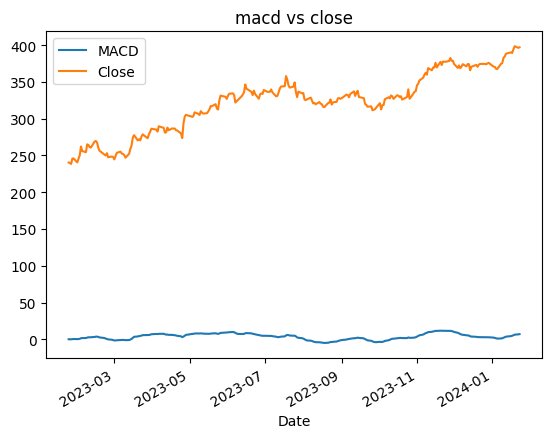

In [ ]:
msft_macd=msft.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
msft_macd=msft_macd['Close'].to_frame()

msft_macd["MACD"]=-msft_macd.ewm(span=26).mean()+msft_macd.ewm(span=12).mean()
print(msft_macd)
msft_macd[['MACD','Close']].plot(title="macd vs close")


                                Close       SMA20        BOLU        BOLD
Date                                                                     
2023-01-23 00:00:00-05:00  240.447968         NaN         NaN         NaN
2023-01-24 00:00:00-05:00  239.912720         NaN         NaN         NaN
2023-01-25 00:00:00-05:00  238.495285         NaN         NaN         NaN
2023-01-26 00:00:00-05:00  245.820343         NaN         NaN         NaN
2023-01-27 00:00:00-05:00  245.978943         NaN         NaN         NaN
...                               ...         ...         ...         ...
2024-01-17 00:00:00-05:00  389.470001  376.397501  390.236957  362.558044
2024-01-18 00:00:00-05:00  393.869995  377.458501  393.209858  361.707143
2024-01-19 00:00:00-05:00  398.670013  378.729001  396.958633  360.499369
2024-01-22 00:00:00-05:00  396.510010  380.023502  399.465243  360.581760
2024-01-23 00:00:00-05:00  397.165009  381.204752  401.823087  360.586417

[252 rows x 4 columns]


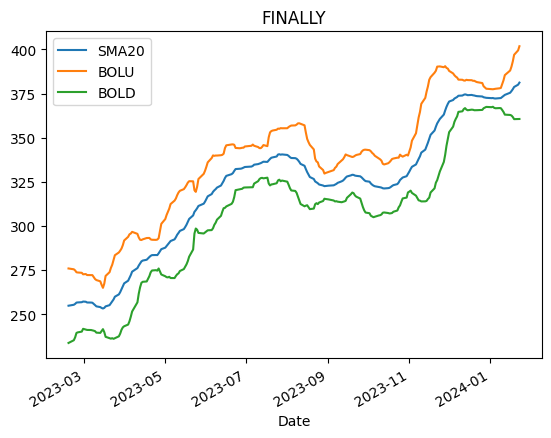

In [ ]:
msft_bol=msft.history(period="1y").drop(['Volume','Dividends',"Stock Splits"],axis=1)
msft_bol=msft_bol['Close'].to_frame()
msft_bol=msft_bol.assign(SMA20=msft_bol.rolling(20).mean(),
                         BOLU=msft_bol.rolling(20).mean()+2*msft_bol.rolling(20).std(),
                         BOLD=msft_bol.rolling(20).mean()-2*msft_bol.rolling(20).std())
msft_bol[['SMA20','BOLU','BOLD']].plot(title="FINALLY")
print(msft_bol)